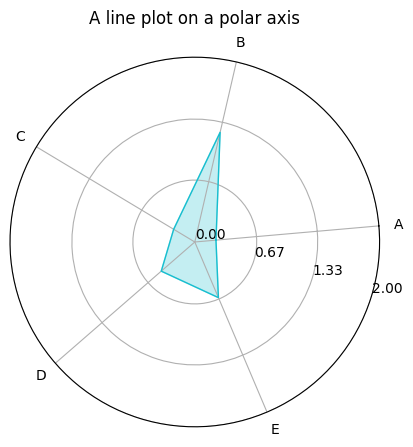

In [ ]:
from typing import List, Literal, Optional

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import matplotlib

np.random.seed(43)


def radar_chart(  # noqa: D417
    label: List[str],
    data: List[float],
    axes_shape: Literal["circle", "polygon"] = "circle",
    cmap=None,
    ax: Optional[Axes] = None,
    show_figure: bool = True,
    show_grid: bool = True,
    rotation: int = 0,
    num_ticks: int = 3,
    vmax: Optional[int] = None,
    vmin: int = 0,
) -> Axes:
    """Generate radar chart with matplotlib.

    Args:
        labels: List of labels to annotate plot.
    """
    assert len(label) > 1, "At least 1 label is required"
    assert len(label) == len(data)

    theta = np.linspace(0, 2 * np.pi, len(label), endpoint=False)

    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, polar=True)

    cmap = matplotlib.colormaps.get_cmap("tab10")

    ax.plot(
        np.concatenate((theta, [theta[0]])),
        np.concatenate((data, [data[0]])),
        linewidth=1,
        color=cmap(1),
        marker=None,
        alpha=1,
    )
    ax.fill(np.concatenate((theta, [theta[0]])), np.concatenate((data, [data[0]])), alpha=0.25, color=cmap(1))

    # TODO: add estimation of vmax and vmin
    # if vmax is None:
    #     vmax = np.round(np.max(np.random.rand(5))

    ax.set_rticks(np.round(np.linspace(vmin, vmax, num_ticks + 2), 2))  # Less radial ticks
    ax.set_rlabel_position(-22)  # Move radial labels away from plotted line

    ax.set_thetagrids(theta * 180 / np.pi, label)
    ax.set_theta_offset(rotation / 180 * np.pi)

    # Add/remove grid
    ax.grid(show_grid)

    ax.set_title("A line plot on a polar axis", va="bottom")

    if show_figure is True:
        plt.show()
    else:
        return ax


radar_chart(label=["A", "B", "C", "D", "E"], data=np.random.rand(5) * 2, rotation=5, num_ticks=2, vmin=0, vmax=2)